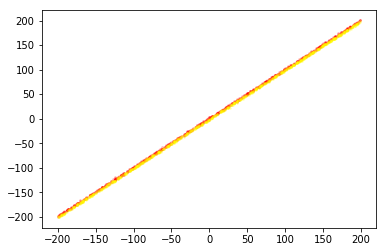

UnboundLocalError: local variable 'l' referenced before assignment

In [183]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x + 1

def f2(x):
    return x - 1


#generating input data
k = 1000
bound = 200

noise1 = np.random.normal(size = k)        
noise2 = np.random.normal(size = k)        
x1 = np.random.randint(-1 * bound, bound, k)
y1 = f1(x1) + noise1
x2 = np.random.randint(-1 * bound, bound, k)
y2 = f2(x2) + noise2

plt.scatter(x1, y1, c = 'red', s = 3, alpha = 0.2)
plt.scatter(x2, y2, c = 'yellow', s = 3, alpha = 0.2)
plt.show()   
x = []
y = []
for i in range(0, k):
    x.append(x1[i])
    x.append(x2[i])
    y.append(y1[i])
    y.append(y2[i])
        
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


def a(v1, v2):
    return np.dot(v1, v2)

def Q(x, y, w):
    l = x.shape[0]
    x_expanded = np.hstack((x, np.ones((l, 1))))
    return (1. / l) * sum(((a(w, x_expanded[i]) - y[i]) ** 2 for i in range(0, l)))

def grad(x, y, w):
    l = x.shape[0]
    arg1 = x.T
    arg2 = np.subtract(np.dot(x, w), y)
    return (2. / l) * np.dot(arg1, arg2)

def classify(x_arr, y_arr):
    x = np.array(x_arr)
    x = x.reshape(x.shape[0], -1)
    x_expanded = np.hstack((x, np.ones((l, 1))))
    l = x.shape[0]
    d = x.shape[1]
    y = np.array(y_arr)
    w = np.zeros(d + 1)
    c = 0.0001
    for t in range(1, 100):
        g = grad(x_expanded, y, w)
        tmp = g * (c / t)
        w = w - tmp
    print w
    

classify(x_train, y_train)